In [1]:
import os
import numpy as np
import pickle

In [2]:
with open("../names_groups.pkl", "rb")  as f:
    names, groups = pickle.load(f)

In [3]:
groups_coocurrence = dict()
for name, chains in names.items():
    # Get the unique groups that represent this protein
    # (we are not filtering by uniprotkb)
    protein_groups = sorted({groups[chain] for chain in chains if groups[chain] is not None})
    
    for chain in chains:
        g = groups[chain]
        if g not in groups_coocurrence:
            groups_coocurrence[g] = []
        # if this coocurrence set hasn't appeared yet, add it
        if protein_groups not in groups_coocurrence[g]:
            groups_coocurrence[g].append(protein_groups)

Text(0, 0.5, 'number of clusters')

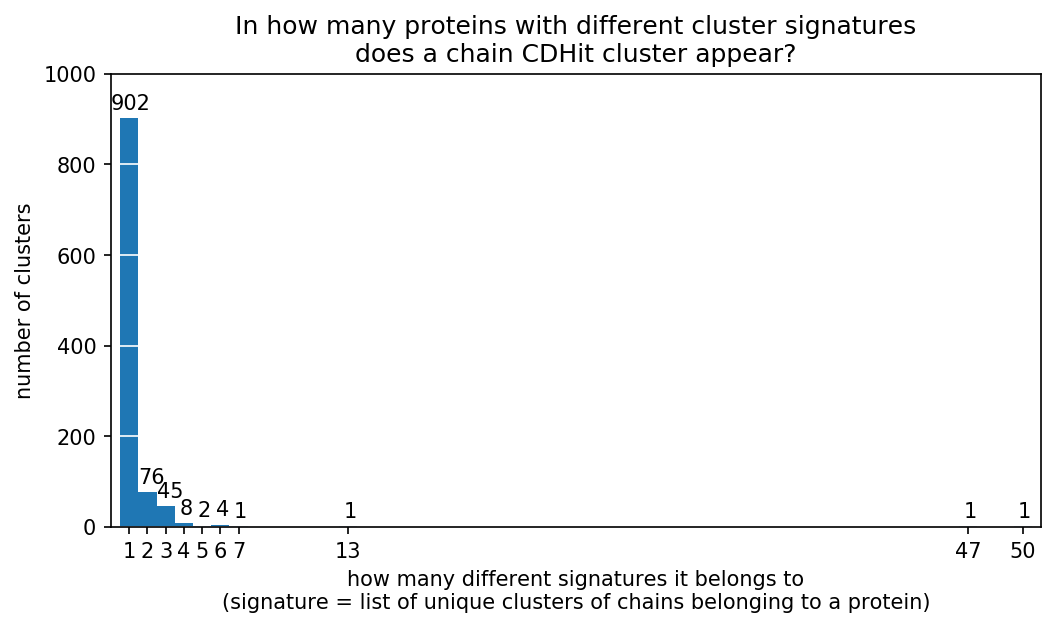

In [6]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
counts, bins, patches = plt.hist([len(v) for v in groups_coocurrence.values()], bins=50, align="left")
for count, binx in zip(counts, bins):
    if count > 100:
        plt.text(binx-1, count+20, str(int(count)), )
    elif count > 10:
        plt.text(binx-0.5, count+20, str(int(count)), )
    elif count > 0:
        plt.text(binx-0.25, count+20, str(int(count)), )
plt.grid(True, axis="y", color="white", )

plt.xticks([bins[i] for i,count in enumerate(counts) if count > 0],
           [str(int(bins[i])) for i,count in enumerate(counts) if count > 0])
plt.xlim(0, 51)
plt.ylim(0, 1000)
plt.title("In how many proteins with different cluster signatures\n"
          "does a chain CDHit cluster appear?")
plt.xlabel("how many different signatures it belongs to\n"
           "(signature = list of unique clusters of chains belonging to a protein)")
plt.ylabel("number of clusters")
#plt.

(0, 1000)

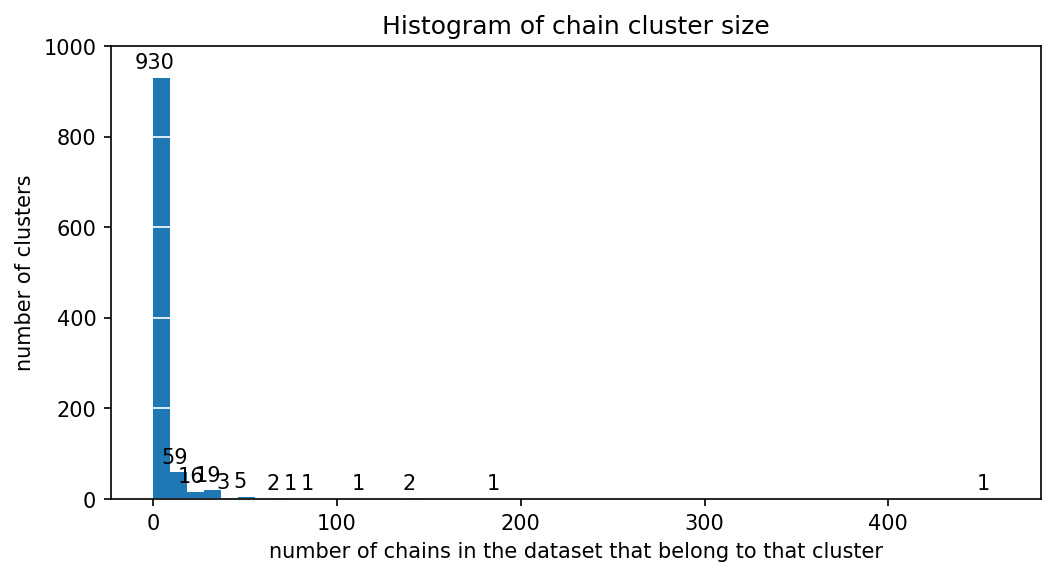

In [7]:
inv_group = {g:[] for g in set(groups.values())}
for chain, group in groups.items():
    if group is not None:
        inv_group[group].append(chain)

plt.figure(figsize=(8, 4))
counts, bins, patches = plt.hist([len(v) for v in inv_group.values()], 
                                 bins=50, align="mid")
for count, binx in zip(counts, bins):
    if count > 100:
        plt.text(binx-10, count+20, str(int(count)), )
    elif count > 10:
        plt.text(binx-5, count+20, str(int(count)), )
    elif count > 0:
        plt.text(binx-2.5, count+20, str(int(count)), )
plt.grid(True, axis="y", color="white", )
plt.title("Histogram of chain cluster size")
plt.xlabel("number of chains in the dataset that belong to that cluster")
plt.ylabel("number of clusters")
plt.ylim(0,1000)


Text(0, 0.5, 'Amount of proteins')

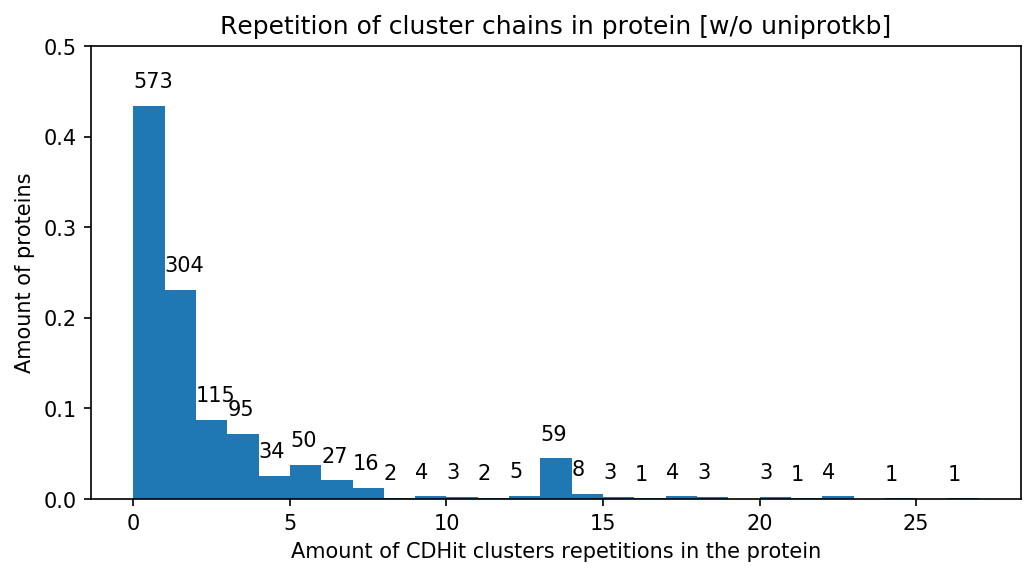

In [8]:
from collections import Counter
num_of_repeated = {
    pdbid:sum([reps-1 
               for group,reps in Counter([groups[chain] for chain in chains]).most_common()])
    for pdbid, chains in names.items()
}

plt.figure(figsize=(8, 4))
counts, bins, patches = plt.hist(list(num_of_repeated.values()), bins=list(range(28)), density=True)
for prob, binx in zip(counts, bins):
    count = prob*len(num_of_repeated)
    if count > 100:
        plt.text(binx-0, prob+0.02, str(int(count)), )
    elif count > 10:
        plt.text(binx-0, prob+0.02, str(int(count)), )
    elif count > 0:
        plt.text(binx-0, prob+0.02, str(int(count)), )
plt.ylim(0,0.5)
plt.title("Repetition of cluster chains in protein [w/o uniprotkb]")
plt.xlabel("Amount of CDHit clusters repetitions in the protein")
plt.ylabel("Amount of proteins")